<a href="https://colab.research.google.com/github/Pranavsai2077/DJango/blob/main/brain_tumor_classification_cnn_977.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1 Toolkit

In [ ]:
import zipfile
import os

# Specify the path to the zip file within the sample data
zip_file_path = "/content/sample_data/archive.zip"

# Specify the directory where you want to extract the contents
extracted_folder_path = "/content/sample_data"

# Create the target directory if it doesn't exist
os.makedirs(extracted_folder_path, exist_ok=True)

# Unzip the folder
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder_path)

# Display the list of extracted files
extracted_files = os.listdir(extracted_folder_path)
print("Files extracted:", extracted_files)


Files extracted: ['README.md', 'anscombe.json', '.ipynb_checkpoints', 'archive.zip', 'Training', 'Testing', 'california_housing_train.csv', 'mnist_test.csv', 'california_housing_test.csv', 'mnist_train_small.csv']


### A- System modules

In [ ]:
import os
import itertools
from PIL import Image

### B- Preprocessing modules

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

import cv2

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix


### C- Deep Learning modules

In [ ]:
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation
from tensorflow.keras.optimizers import Adam, Adamax


### D- Avoid Warnings

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# 2  Preprocessing

## A- Read data

#### ** Training data

In [ ]:
# Get Paths of Training and testing directories

Training = 'sample_data/Training'

# Create two lists to store paths of images and their labels

imgpaths = []
labels =[]


# Convert directories to lists

tr_dir = os.listdir(Training)


In [ ]:
# Get paths and Labels of classes and images in Training Directory

for i in tr_dir:
    classpath = os.path.join(Training, i)
    imglist = os.listdir(classpath)

    for img in imglist:
        imgpath = os.path.join(classpath, img)

        imgpaths.append(imgpath)
        labels.append(i)

In [ ]:
# Convert two lists of imgpaths and their labels into series

Paths = pd.Series(imgpaths, name = 'Paths')
Labels = pd.Series(labels, name = 'Labels')

# Concatenate them in one Dataframe called Tr_data

Tr_data = pd.concat([Paths, Labels], axis = 1)


#### ** Testing data

In [ ]:
# Get Paths of testing directory

Testing = 'sample_data/Testing'


# Create two lists to store paths of images and their labels

imgpaths = []
labels =[]


# Convert directories to lists

ts_dir = os.listdir(Testing)

In [ ]:
# Get paths and Labels of classes and images in Training Directory

for i in ts_dir:
    classpath = os.path.join(Testing, i)
    imglist = os.listdir(classpath)

    for img in imglist:
        imgpath = os.path.join(classpath, img)

        imgpaths.append(imgpath)
        labels.append(i)

In [ ]:
# Convert two lists of imgpaths and their labels into series

Paths = pd.Series(imgpaths, name = 'Paths')
Labels = pd.Series(labels, name = 'Labels')

# Concatenate them in one Dataframe called Tr_data

Ts_data = pd.concat([Paths, Labels], axis = 1)

In [ ]:
Tr_data.shape

(11424, 2)

In [ ]:
Tr_data.head()

,Paths,Labels
0,sample_data/Training/meningioma/Tr-me_1151.jpg,meningioma
1,sample_data/Training/meningioma/Tr-me_0099.jpg,meningioma
2,sample_data/Training/meningioma/Tr-me_0386.jpg,meningioma
3,sample_data/Training/meningioma/Tr-me_0357.jpg,meningioma
4,sample_data/Training/meningioma/Tr-me_0730.jpg,meningioma


In [ ]:
Ts_data.shape

(1311, 2)

In [ ]:
Ts_data.head()

,Paths,Labels
0,sample_data/Testing/meningioma/Te-me_0232.jpg,meningioma
1,sample_data/Testing/meningioma/Te-me_0040.jpg,meningioma
2,sample_data/Testing/meningioma/Te-me_0060.jpg,meningioma
3,sample_data/Testing/meningioma/Te-me_0210.jpg,meningioma
4,sample_data/Testing/meningioma/Te-me_0254.jpg,meningioma


## B- Split Ts_data into Valid and test

In [ ]:
valid_df, test_df = train_test_split(Ts_data, train_size = 0.5, shuffle = True, random_state = 123)
print(valid_df.shape)
print(test_df.shape)

(655, 2)
(656, 2)


## C- Create Image Generators

In [ ]:
# Define hyperparameters

batch_size = 20
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)


#Create generators

Tr_G = ImageDataGenerator(fill_mode='nearest')

Val_G = ImageDataGenerator()

Test_G = ImageDataGenerator()


## D- Generate Appropriate Data for fitting into model

In [ ]:
Train = Tr_G.flow_from_dataframe(Tr_data, x_col = 'Paths', y_col = 'Labels', target_size = img_size, class_mode = 'categorical', color_mode = 'rgb', shuffle = True, batch_size = batch_size)

Found 11424 validated image filenames belonging to 4 classes.


In [ ]:
Valid = Val_G.flow_from_dataframe(valid_df, x_col = 'Paths', y_col = 'Labels', target_size = img_size, class_mode = 'categorical', color_mode = 'rgb', shuffle = True, batch_size = batch_size)

Found 655 validated image filenames belonging to 4 classes.


In [ ]:
Test = Test_G.flow_from_dataframe(test_df, x_col = 'Paths', y_col = 'Labels', target_size = img_size, class_mode = 'categorical', color_mode = 'rgb', shuffle = False, batch_size = batch_size)

Found 656 validated image filenames belonging to 4 classes.


## E- Represent a sample batch from Train data

### ** Define labels and their indices as a dict

In [ ]:
L_index = Train.class_indices
L_index

{'glioma': 0, 'meningioma': 1, 'notumor': 2, 'pituitary': 3}

### ** Store Labels in a list

In [ ]:
Keys = list(L_index.keys())
Keys

['glioma', 'meningioma', 'notumor', 'pituitary']

### ** Get a sample batch

In [ ]:
imgs, labels = next(Train)


### ** Lets visualize

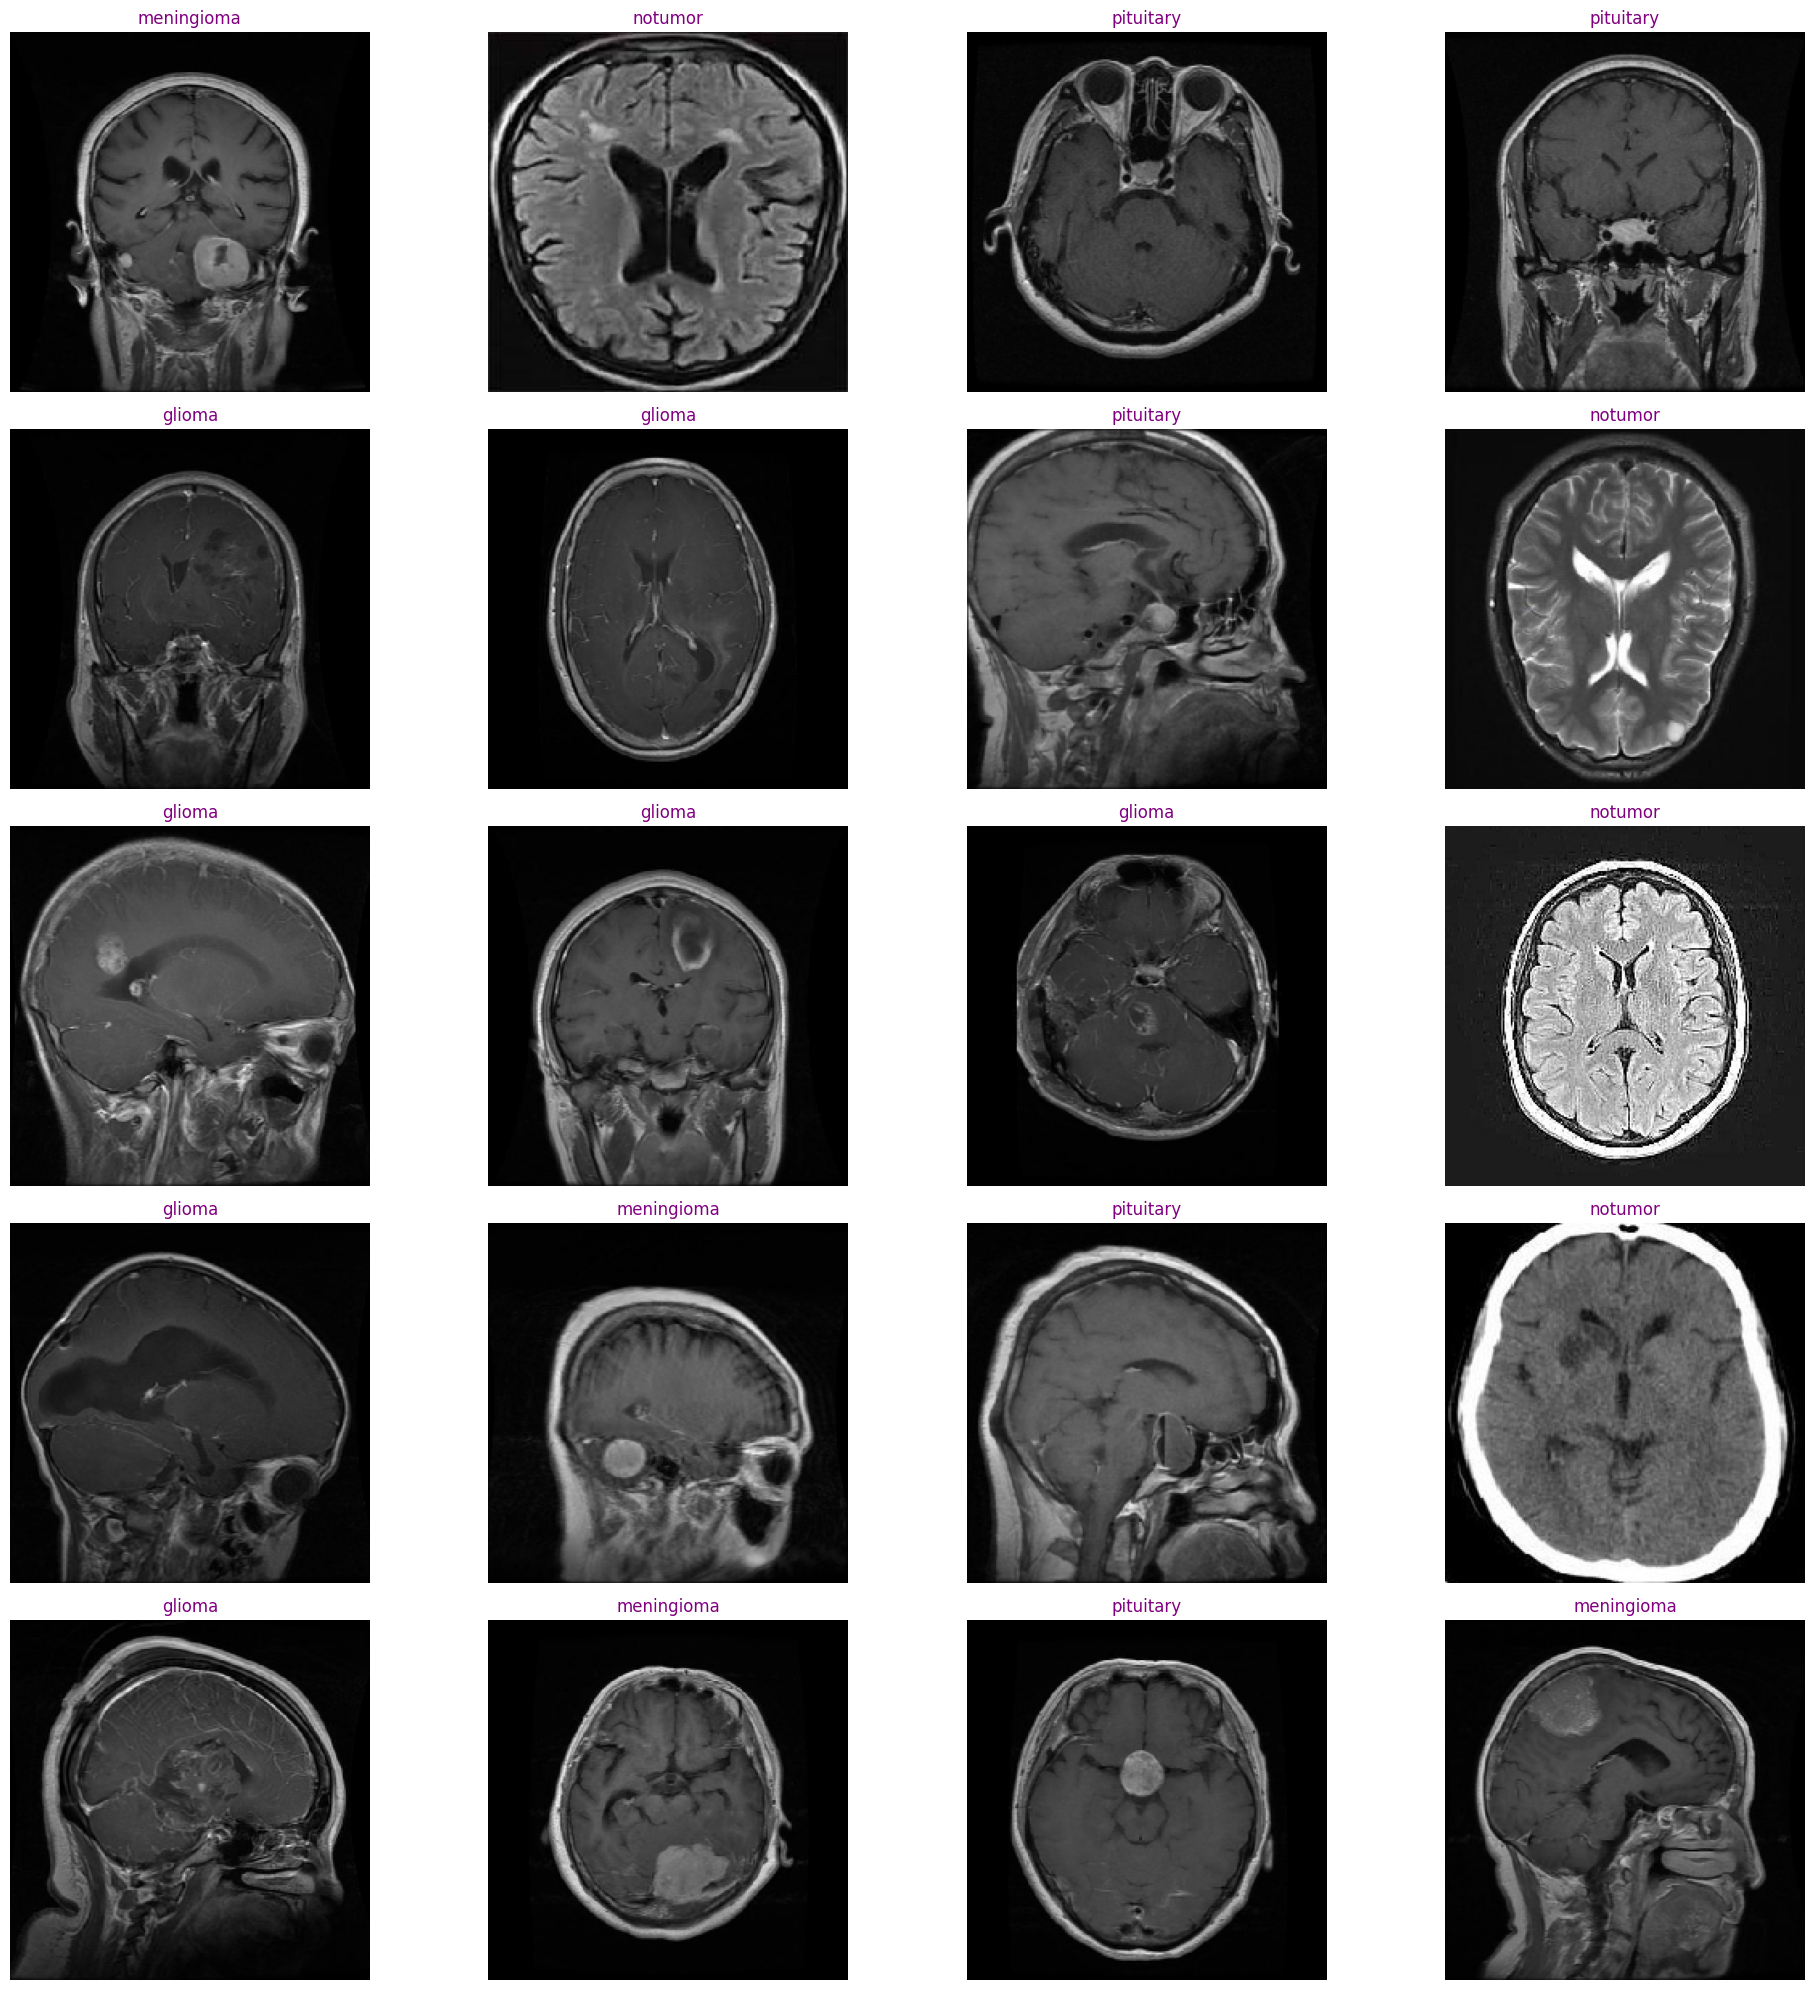

In [ ]:
plt.figure(figsize= (20, 20))

for i in range(20):
    plt.subplot(5, 4, i +1)
    im = imgs[i]/255
    plt.imshow(im)

    #Labelling
    index = np.argmax(labels[i])
    label = Keys[index]
    plt.title(label, color = 'purple')
    plt.axis('off')

plt.tight_layout()
plt.show()


# 3- Model Structure

In [ ]:
# Define hyperparameters

batch_size = 20
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)


#Create generators

Tr_G = ImageDataGenerator(fill_mode='nearest')

Val_G = ImageDataGenerator()

Test_G = ImageDataGenerator()



In [ ]:
Train

In [ ]:
# Define number of classes
counter_classes = len(list(Train.class_indices.keys()))
counter_classes

4

In [ ]:
CNN = Sequential([
    Conv2D(filters = 128, kernel_size = (3,3), padding = 'same', activation = 'elu', input_shape = img_shape),
    Conv2D(filters = 128, kernel_size = (3,3), padding = 'same', activation = 'elu'),
    Conv2D(filters = 128, kernel_size = (3,3), padding = 'same', activation = 'elu'),
    MaxPooling2D((2,2)),

    Conv2D(filters = 256, kernel_size = (3,3), padding = 'same', activation = 'elu'),
    Conv2D(filters = 256, kernel_size = (3,3), padding = 'same', activation = 'elu'),
    MaxPooling2D((2,2)),

    Conv2D(filters = 256, kernel_size = (3,3), padding = 'same', activation = 'elu'),
    Conv2D(filters = 256, kernel_size = (3,3), padding = 'same', activation = 'elu'),
    MaxPooling2D((2,2)),

    Conv2D(filters = 128, kernel_size = (3,3), padding = 'same', activation = 'elu'),
    Conv2D(filters = 128, kernel_size = (3,3), padding = 'same', activation = 'elu'),
    MaxPooling2D((2,2)),

    Conv2D(filters = 64, kernel_size = (3,3), padding = 'same', activation = 'elu'),
    Conv2D(filters = 64, kernel_size = (3,3), padding = 'same', activation = 'elu'),
    MaxPooling2D((2,2)),

    Flatten(),

    Dense(256, activation = 'elu'),
    Dense(128, activation = 'elu'),
    Dense(64, activation = 'elu'),
    Dense(32, activation = 'elu'),
    Dense(counter_classes, activation = 'softmax')
])

In [ ]:
# Model Compilation
CNN.compile(Adamax(learning_rate = 0.001), loss = 'categorical_crossentropy', metrics = 'accuracy')

In [ ]:
# Get summary
CNN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 128)     3584      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 128)     147584    
                                                                 
 conv2d_2 (Conv2D)           (None, 224, 224, 128)     147584    
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 128)     0         
 D)                                                              
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 256)     295168    
                                                                 
 conv2d_4 (Conv2D)           (None, 112, 112, 256)     590080    
                                                        

# 4- Model Training

In [ ]:
Train


In [ ]:
import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)


Physical devices cannot be modified after being initialized


In [ ]:
epochs = 10

history = CNN.fit(x=Train, epochs=epochs, verbose=1, validation_data=Valid, shuffle=False)



Epoch 1/10
572/572 [==============================] - 420s 697ms/step - loss: 0.5259 - accuracy: 0.8124 - val_loss: 0.3940 - val_accuracy: 0.8244
Epoch 2/10
572/572 [==============================] - 401s 702ms/step - loss: 0.2248 - accuracy: 0.9191 - val_loss: 0.2330 - val_accuracy: 0.9053
Epoch 3/10
572/572 [==============================] - 401s 702ms/step - loss: 0.1348 - accuracy: 0.9502 - val_loss: 0.2047 - val_accuracy: 0.9313
Epoch 4/10
572/572 [==============================] - 401s 702ms/step - loss: 0.0927 - accuracy: 0.9675 - val_loss: 0.1959 - val_accuracy: 0.9435
Epoch 5/10
572/572 [==============================] - 401s 702ms/step - loss: 0.0562 - accuracy: 0.9808 - val_loss: 0.1212 - val_accuracy: 0.9603
Epoch 6/10
572/572 [==============================] - 401s 700ms/step - loss: 0.0371 - accuracy: 0.9886 - val_loss: 0.1467 - val_accuracy: 0.9603
Epoch 7/10
572/572 [==============================] - 400s 699ms/step - loss: 0.0429 - accuracy: 0.9836 - val_loss: 0.0986 -

# 5- Model Evaluation

## A- Define certain Vars

In [ ]:
# accuracy and loss of Train

tr_acc = history.history['accuracy']
tr_loss = history.history['loss']


# accuracy and loss or Valid\

v_acc = history.history['val_accuracy']
v_loss = history.history['val_loss']


# highest value of v_acc by getting its index

index_acc = np.argmax(v_acc)
high_Vacc = v_acc[index_acc]


# lowest value of v_loss by getting index

index_loss = np.argmin(v_loss)
low_Vloss = v_loss[index_loss]


# n. of epochs based on length of tr_acc values

Epochs =[]
for i in range(len(tr_acc)):
    Epochs.append (i+1)


# Define best epoch

best_acc = f'Best epoch ={str(index_acc +1)}'
best_loss = f'Best epoch ={str(index_loss+1)}'

In [ ]:
# check Epochs and tr_acc
print(Epochs)
print(tr_acc)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[0.812412440776825, 0.9191176295280457, 0.9501925706863403, 0.967524528503418, 0.9808298349380493, 0.9886204600334167, 0.9836309552192688, 0.9922969341278076, 0.9974614977836609, 0.9968487620353699]


## B- Lets Visualise

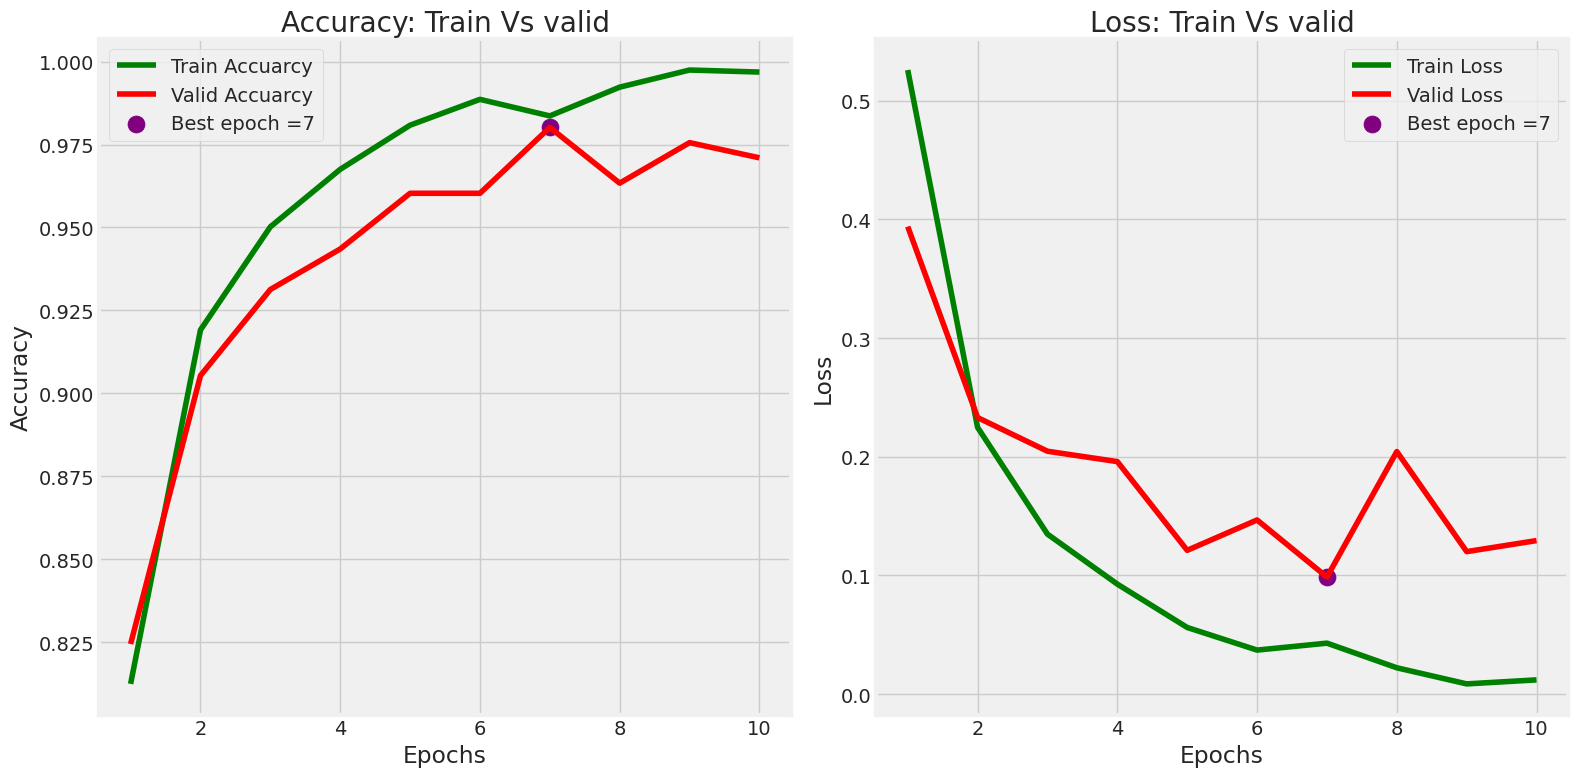

In [ ]:
plt.figure(figsize = (16, 8))
plt.style.use('fivethirtyeight')


plt.subplot(1,2,1)
plt.plot(Epochs, tr_acc, "g", label = "Train Accuarcy")
plt.plot(Epochs, v_acc, "r", label = "Valid Accuarcy")
plt.scatter(index_acc+1, high_Vacc, s= 150, color = 'purple', label = best_acc)

plt.title("Accuracy: Train Vs valid")
plt. xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()


plt.subplot(1,2,2)
plt.plot(Epochs, tr_loss, "g", label = "Train Loss")
plt.plot(Epochs, v_loss, "r", label = "Valid Loss")
plt.scatter(index_loss+1, low_Vloss, s= 150, color = 'purple', label = best_loss)

plt.title("Loss: Train Vs valid")
plt. xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

## C- Get scores

In [ ]:
# Define Vars
Train_sc = CNN.evaluate(Train, verbose = 0)
Valid_sc = CNN.evaluate(Valid, verbose = 0)
Test_sc =CNN.evaluate(Test, verbose = 0)

#Print
print('Train Scores : \n    accuracy:', Train_sc[1], '\n      Loss: ', Train_sc[0], '\n________________________')
print('Valid Scores : \n    accuracy:', Valid_sc[1], '\n      Loss: ', Valid_sc[0], '\n________________________')
print('Test Scores : \n    accuracy:', Test_sc[1], '\n      Loss: ', Test_sc[0], '\n________________________')

Train Scores : 
    accuracy: 0.9956232309341431 
      Loss:  0.013086013495922089 
________________________
Valid Scores : 
    accuracy: 0.970992386341095 
      Loss:  0.129377543926239 
________________________
Test Scores : 
    accuracy: 0.9847561120986938 
      Loss:  0.08183377236127853 
________________________


# 6- Model prdictions

In [ ]:
predictions = CNN.predict_generator(Test)
y_pred = np.argmax(predictions, axis = 1)

#Chack
print(predictions)
print(y_pred)

[[5.6470998e-11 1.0767910e-09 1.0000000e+00 9.2629175e-11]
 [9.5658886e-01 4.3400835e-02 5.1246884e-06 5.0888393e-06]
 [1.3697204e-13 2.9501229e-10 1.5388159e-11 1.0000000e+00]
 ...
 [1.0448060e-09 3.2911139e-06 2.4071636e-05 9.9997258e-01]
 [1.5143089e-01 8.4855312e-01 7.1692654e-07 1.5215415e-05]
 [9.9999213e-01 5.2623322e-10 7.7984814e-06 1.2181250e-08]]
[2 0 3 1 2 0 0 3 2 3 3 2 0 0 0 0 2 3 3 2 3 3 1 1 3 2 1 0 1 2 1 1 2 2 0 1 3
 0 3 1 1 2 2 3 0 0 0 2 2 3 1 2 2 0 1 0 2 3 1 2 0 3 2 2 2 3 0 2 3 2 1 3 1 3
 3 1 2 2 3 0 0 2 2 2 0 1 0 1 0 2 3 1 0 1 0 0 0 0 2 2 1 2 2 3 0 2 1 0 2 2 1
 0 3 1 1 3 2 0 3 0 3 2 0 2 1 2 3 1 1 2 1 1 1 2 0 1 3 0 1 3 2 2 1 0 1 3 0 3
 2 1 1 1 0 2 2 1 2 2 2 1 3 1 2 1 0 0 3 3 1 1 1 1 3 1 1 2 1 0 3 3 3 1 1 1 0
 3 1 1 2 1 3 1 0 3 2 2 1 1 1 0 1 2 3 2 3 1 1 2 1 1 3 0 3 2 2 1 3 2 2 0 1 1
 2 2 3 2 1 3 1 3 3 0 3 2 3 2 2 1 2 2 3 2 2 1 1 0 2 0 2 2 3 2 0 0 1 0 3 1 2
 1 2 1 0 0 0 3 0 2 3 3 1 1 2 1 3 2 2 2 3 3 0 0 0 2 0 3 3 1 3 3 2 1 0 0 2 1
 3 2 0 3 3 2 0 1 3 2 1 3 2 3 3 2 0 0 2 2

In [ ]:
# Use n. of keys of  Class indices to greate confusion matrix
Test_cl_ind = Test.class_indices

# Get Keys
classes = list(Test_cl_ind.keys())

#CM
cm = confusion_matrix(Test.classes, y_pred)
cm

array([[132,   7,   0,   0],
       [  1, 167,   0,   1],
       [  0,   0, 198,   1],
       [  0,   0,   0, 149]])

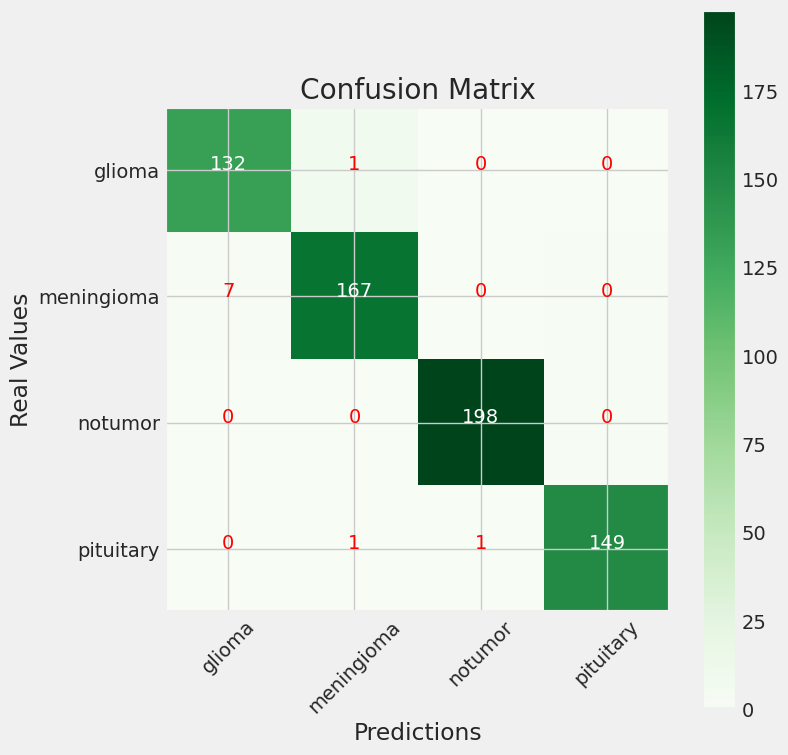

In [ ]:
#visualise it
plt.figure(figsize =(8, 8))
plt.imshow(cm, interpolation = 'nearest', cmap = plt.cm.Greens)
plt.title("Confusion Matrix")
plt.colorbar()

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes,rotation = 45)
plt.yticks(tick_marks, classes)

thresh = cm.max()/2
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(i, j, cm[i, j], horizontalalignment = 'center', color = 'white' if cm[i,j] > thresh  else 'red')

plt.tight_layout()
plt.xlabel('Predictions')
plt.ylabel('Real Values')
plt.show()


In [ ]:
# Calssification Report
print(classification_report(Test.classes, y_pred, target_names = classes))

              precision    recall  f1-score   support

      glioma       0.99      0.95      0.97       139
  meningioma       0.96      0.99      0.97       169
     notumor       1.00      0.99      1.00       199
   pituitary       0.99      1.00      0.99       149

    accuracy                           0.98       656
   macro avg       0.98      0.98      0.98       656
weighted avg       0.99      0.98      0.98       656



# 7- Save Model

In [ ]:
CNN.save('CNN.h5')

# 8- Load Model to get prediction

## A- Load save model

In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow.keras.optimizers import Adamax

In [5]:
CNN = tf.keras.models.load_model("CNN.h5", compile = False)
CNN.compile(Adamax(learning_rate = 0.001), loss = 'categorical_crossentropy', metrics = 'accuracy')

## B- Test a model by acertain image path

In [6]:
import numpy as np
from tensorflow.keras.preprocessing.image import img_to_array
from PIL import Image

# Image path
path = 'sample_data/Testing/meningioma/Te-meTr_0001.jpg'

# Open the image using the 'Image.open()` function from PIL
img = Image.open(path)

# Preprocess the image
img1 = img.resize((224, 224))

# Convert the image to a NumPy array
iArray = img_to_array(img1)

# Expand the dimensions of the array
iArray = tf.expand_dims(iArray, 0)

# Make predictions using the CNN model
p = CNN.predict(iArray)

# Get the probability scores for each class
score = tf.nn.softmax(p[0])

# Print the predictions and their corresponding scores
print('\nPredictions of given image:  \n\n', score)

# Get the class with the maximum probability
cl_labels = ['glioma', 'meningioma', 'notumor', 'pituitary']
predicted_class = cl_labels[np.argmax(p)]

# Print the predicted class
print(f'-------------------------\nClass whose max ratio: \n\n{predicted_class}')


1/1 [==============================] - 8s 8s/step

Predictions of given image:  

 tf.Tensor([0.17488842 0.47529963 0.17492364 0.17488834], shape=(4,), dtype=float32)
-------------------------
Class whose max ratio: 

meningioma
